In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
full_vec = np.load('full_vec.npy')

X_train, X_test, y_train, y_test = train_test_split(full_vec[:,:-4], full_vec[:,-4:], test_size=0.2, random_state=42)

print('{:17}{:d}x{:d}'.format('Training set is.',*X_train.shape))
print('{:17}{:d}x{:d}'.format('Testing set is..',*X_test.shape))



# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(C=2.5, kernel='rbf', probability=True,
                                 random_state=None))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Training set is. 7377x416
Testing set is.. 1845x416


In [9]:
# Compute ROC curve and ROC area for each class

n_classes = y_train.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

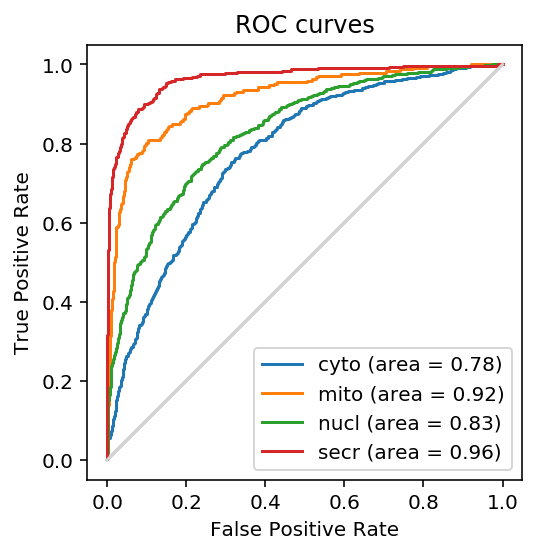

In [32]:
plt.figure()
cats=['cyto', 'mito', 'nucl', 'secr']
for i in range(4):
    plt.plot(fpr[i], tpr[i], label='%s (area = %0.2f)' % (cats[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.axis('square')
plt.show()

In [22]:
y_test[1:2, :]

array([[ 1.,  0.,  0.,  0.]])

In [30]:
np.bincount([1,2,3,3,3,3,3,3,2,1])

array([0, 2, 2, 6])

In [28]:
y_test

array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]])